In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv",encoding_errors='ignore')

In [3]:
df.shape

(5572, 5)

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df[['v1','v2']]

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deployment

## Data Cleaning

In [8]:
df.rename(columns={'v1':'result','v2':'email'},inplace=True)
df.head()

,result,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['result'] = encoder.fit_transform(df['result'])

In [11]:
df.head()

,result,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#check missing values
df.isnull().sum()

result    0
email     0
dtype: int64

In [13]:
#check for duplicate values
df.duplicated().sum()

404

In [14]:
df = df.drop_duplicates(keep = 'first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5168, 2)

## EDA (Expolatory Data Analysis)

In [17]:
df['result'].value_counts()

0    4516
1     652
Name: result, dtype: int64

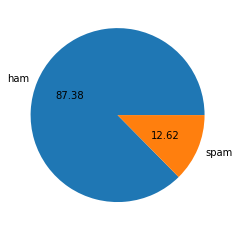

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['result'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
!pip install nltk

In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
df['email_char'] = df['email'].apply(len)

In [22]:
df.head()

,result,email,email_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['email_words'] = df['email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,result,email,email_char,email_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['email_sent'] = df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,result,email,email_char,email_words,email_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['email_char','email_words','email_sent']].describe()

,email_char,email_words,email_sent
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.440789,1.962074
std,58.104099,13.325276,1.433418
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# For ham
df[df['result'] == 0][['email_char','email_words','email_sent']].describe()

,email_char,email_words,email_sent
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108503,1.815323
std,56.328803,13.492074,1.363662
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# For spam
df[df['result'] == 1][['email_char','email_words','email_sent']].describe()

,email_char,email_words,email_sent
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.978528
std,29.937352,7.015283,1.492274
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='email_char', ylabel='Count'>

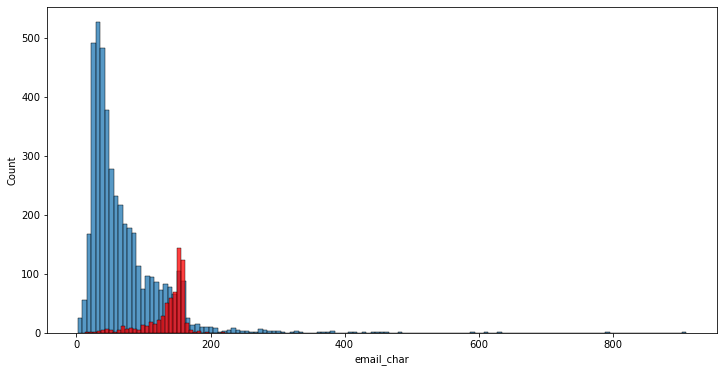

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['result'] == 0]['email_char'])
sns.histplot(df[df['result'] == 1]['email_char'],color='red')

<AxesSubplot:xlabel='email_words', ylabel='Count'>

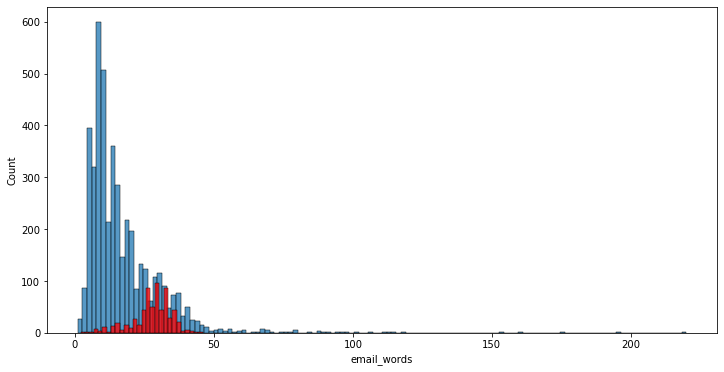

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['result'] == 0]['email_words'])
sns.histplot(df[df['result'] == 1]['email_words'],color='red')

<AxesSubplot:xlabel='email_sent', ylabel='Count'>

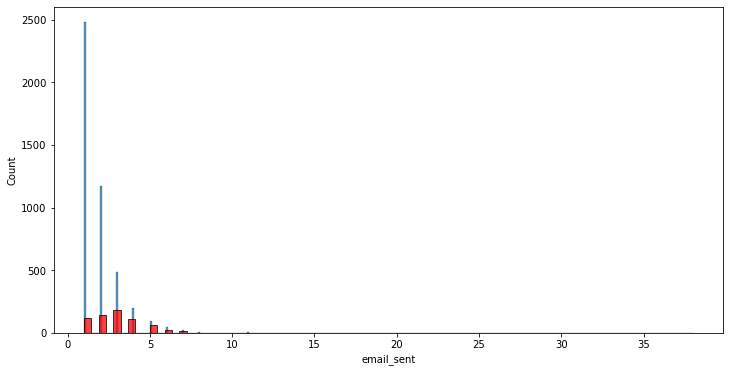

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['result'] == 0]['email_sent'])
sns.histplot(df[df['result'] == 1]['email_sent'],color='red')

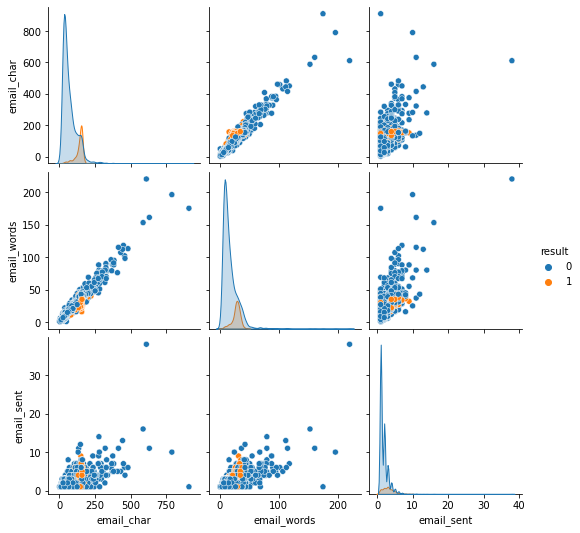

In [34]:
sns.pairplot(df,hue='result')

<AxesSubplot:>

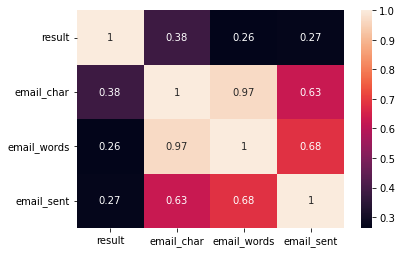

In [35]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing
1. Lower case
2. Tokenization
3. Removing Special Characters
4. Removing stop words and punctuation
5. Stemming

In [36]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    l = []
    for i in text:
        if i.isalnum():
            l.append(i)
    
    text = l[:]
    l.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(i)
            
    text = l[:]
    l.clear()
    
    for i in text:
        l.append(ps.stem(i))
        
    return " ".join(l)

In [38]:
transform_text("Hi Surya how are you i loved you mate ?")

'hi surya love mate'

In [39]:
df['transformed_email'] = df['email'].apply(transform_text)

In [40]:
df.head()

,result,email,email_char,email_words,email_sent,transformed_email
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
!pip install wordcloud

In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [43]:
spam_words = wc.generate(df[df['result'] == 1]['transformed_email'].str.cat(sep=' '))

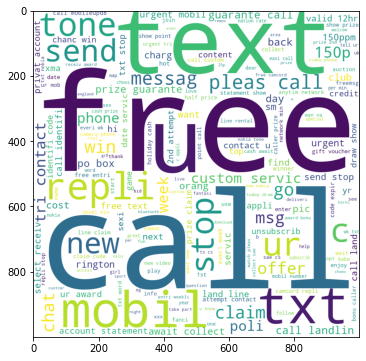

In [44]:
plt.figure(figsize=(12,6))
plt.imshow(spam_words)

In [45]:
ham_words = wc.generate(df[df['result'] == 0]['transformed_email'].str.cat(sep=' '))

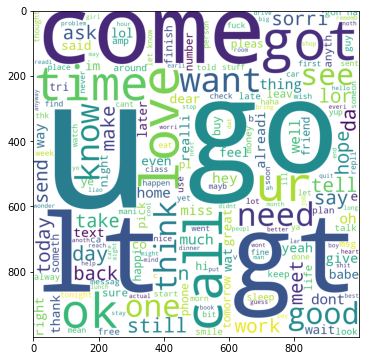

In [46]:
plt.figure(figsize=(12,6))
plt.imshow(ham_words)

In [47]:
spam_corpus = []
for msg in df[df['result'] == 1]['transformed_email'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

10106

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


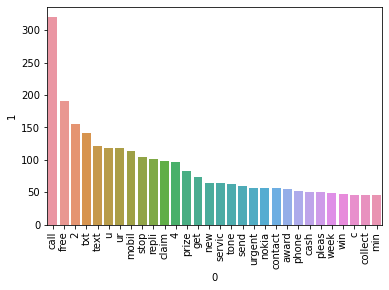

In [49]:
from collections import Counter
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(spam_corpus_df[0],spam_corpus_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus = []
for msg in df[df['result'] == 0]['transformed_email'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

35378

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


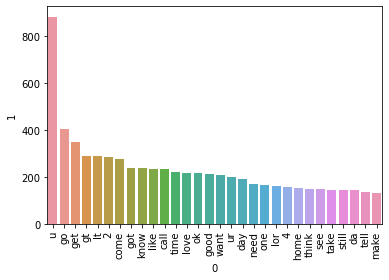

In [52]:
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(ham_corpus_df[0],ham_corpus_df[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
# X = cv.fit_transform(df['transformed_email']).toarray()
X = tfidf.fit_transform(df['transformed_email']).toarray()

In [55]:
X.shape

(5168, 3000)

In [56]:
y = df['result'].values

In [57]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [61]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [62]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8752417794970987
0.5277777777777778
[[791 102]
 [ 27 114]]


In [63]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9700193423597679
1.0
[[893   0]
 [ 31 110]]


In [64]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9796905222437138
0.9918032786885246
[[892   1]
 [ 20 121]]


In [65]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [66]:
!pip install jovian --upgrade

In [69]:
import jovian
jovian.commit(filename='ECS.ipynb')

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY:

  ·······························································································································································································································································································································


[jovian] Committed successfully! https://jovian.ai/suryansh9315/ecs


'https://jovian.ai/suryansh9315/ecs'